EDA  Importar bibliotecas necesarias para realizar EDA 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Validar si exiten missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#Checc datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#Chech estadistics describtivas

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
print("Categories in 'gender' variable ", end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethenicity variable", end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' ", end="")
print(df['parental level of education'].unique())

Categories in 'gender' variable  ['female' 'male']
Categories in 'race/ethenicity variable['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [25]:
#Definir las columnas que son categoricas y cuantitivas
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(numeric_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [21]:
columns = df.columns
df[columns[0]].dtype

dtype('O')

In [26]:
#Ad column total and average

df['Total_Score'] = df['reading score'] + df['writing score'] + df['math score']
df['Average'] = df['Total_Score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
#The students that are genius :

math_full = df[df['math score'] == 100]['Average'].count()
reading_full = df[df['reading score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
print(reading_full)
print(math_full)
print(writing_full)

17
7
14


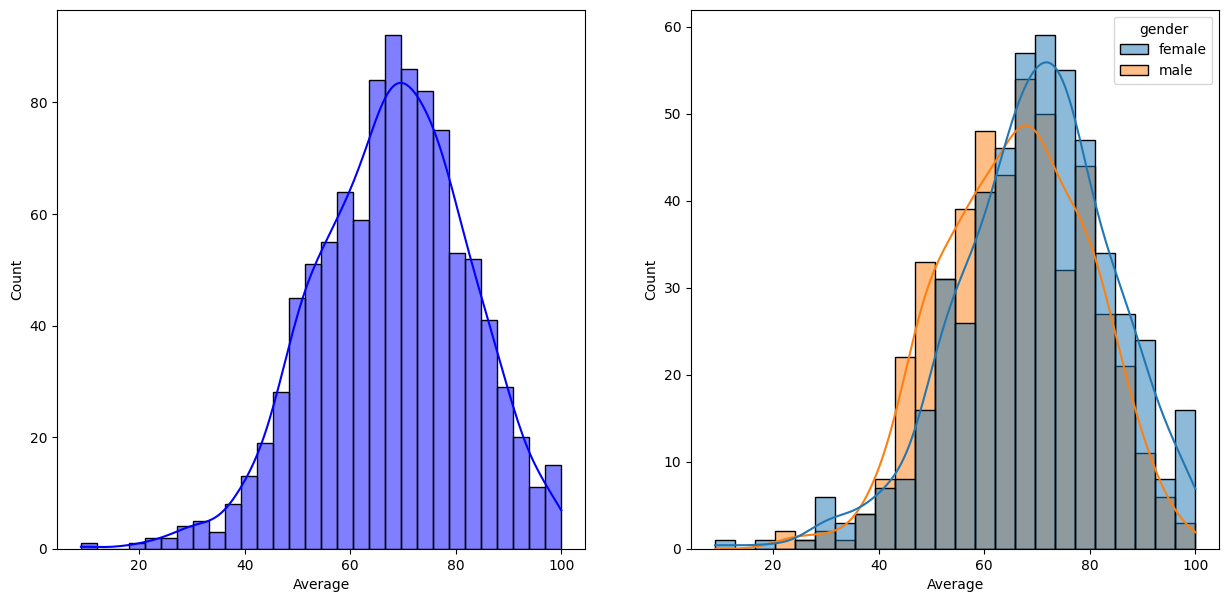

In [40]:
#Visualización y distribución 
#Histogram
#Kernel Distribución KDE

fig,axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'Average', bins=30,kde = True, color ='blue')
plt.subplot(122)
#Distinguimos por edad y su promedio
sns.histplot (data = df, x = 'Average' , kde = True, hue = 'gender')
plt.show()

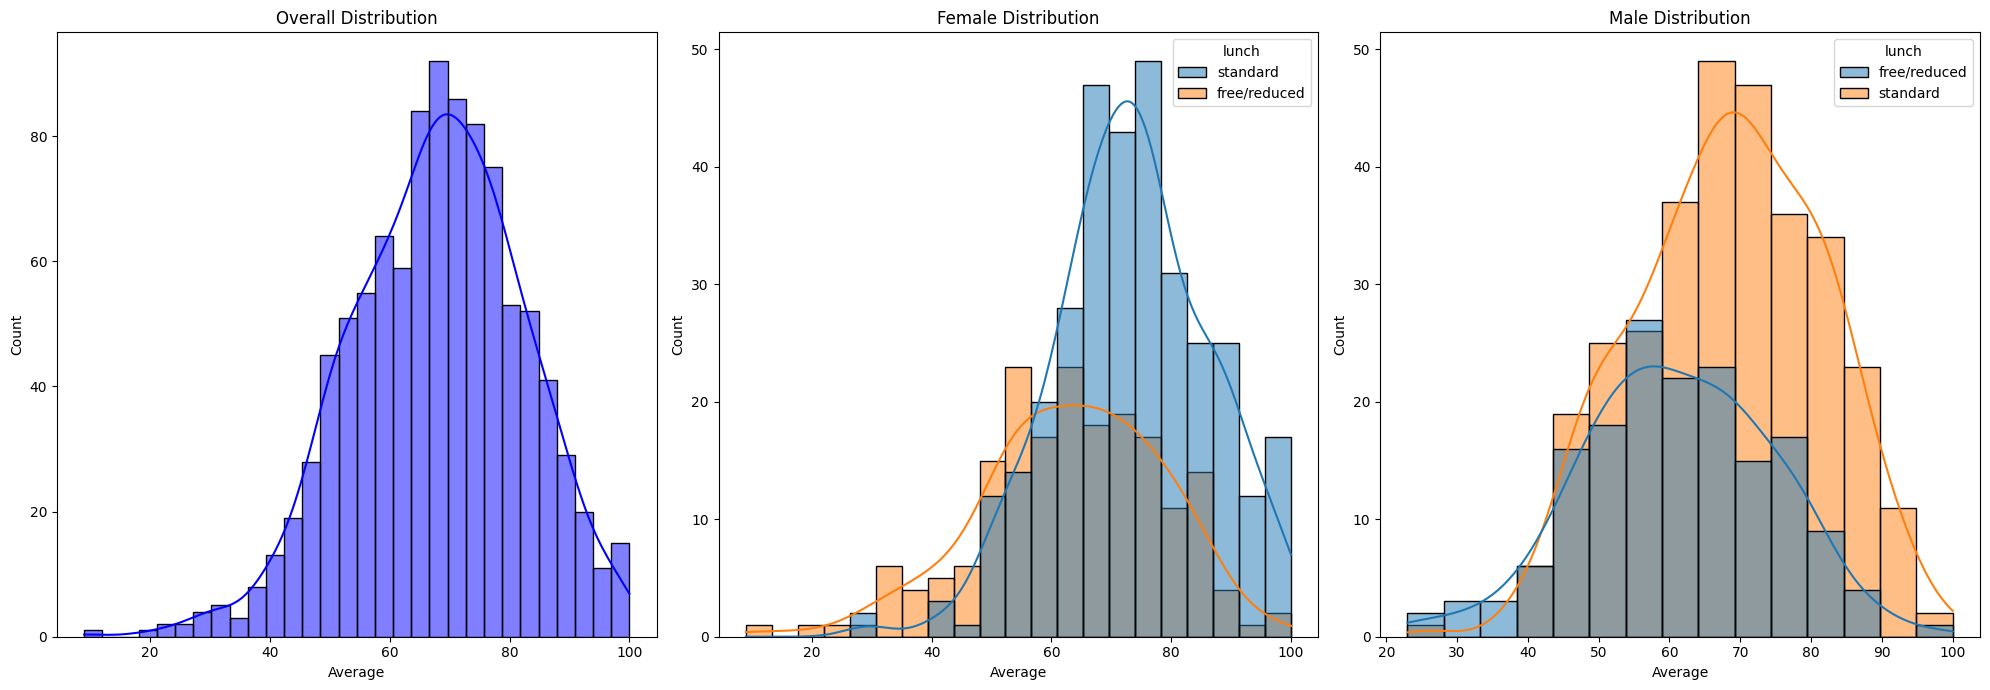

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data=df, x='Average', bins=30, kde=True, color='blue', ax=axs[0])
axs[0].set_title('Overall Distribution')

sns.histplot(data=df[df['gender'] == 'female'], x='Average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Distribution')

sns.histplot(data=df[df['gender'] == 'male'], x='Average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Distribution')

plt.tight_layout()
plt.show()